In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def get_cluster_number(index, cluster):
    i = index
    while i != cluster[i]:
        print(i)
        print(cluster[i])
        i = cluster[i]
    return i


def connect_bond(x1, y1, x2, y2, L, p, spins, cluster):
    if spins[x1, y1]*spins[x2, y2] < 0:
        return cluster
    if np.random.rand() > p:
        return cluster
    # print(cluster)
    i1 = x1 + L*y1
    i2 = x2 + L*y2
    c1 = get_cluster_number(i1, cluster)
    c2 = get_cluster_number(i2, cluster)
    if c1 < c2:
        # cluster[c2] = c1
        cluster[c2] = cluster[c1]
    else:
        # cluster[c1] = c2
        cluster[c1] = cluster[c2]
    return cluster

In [19]:
L = 3
# spins = np.random.choice([-1, 1], size=(L, L))
spins = np.array([[-1, -1, -1], [-1, -1, -1], [1, 1, 1]])
cluster = np.arange(L**2)
flip = np.random.choice([-1, 1], size=(L**2))
p = 1
for x in range(L):
    for y in range(L):
        print("##")
        print(x, y)
        print(cluster.reshape([3, 3]))
        cluster = connect_bond(x, y, (x+1) % L, y, L, p, spins, cluster)
#        cluster = connect_bond(x, y, x, (y+1) % L, L, p, spins, cluster)
        print(cluster.reshape([3, 3]))
for x in range(L):
    for y in range(L):
        print("##")
        print(x, y)
        print(cluster.reshape([3, 3]))
        cluster = connect_bond(x, y, x, (y+1) % L, L, p, spins, cluster)
        print(cluster.reshape([3, 3]))

##
0 0
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 0 2]
 [3 4 5]
 [6 7 8]]
##
0 1
[[0 0 2]
 [3 4 5]
 [6 7 8]]
[[0 0 2]
 [3 3 5]
 [6 7 8]]
##
0 2
[[0 0 2]
 [3 3 5]
 [6 7 8]]
[[0 0 2]
 [3 3 5]
 [6 6 8]]
##
1 0
[[0 0 2]
 [3 3 5]
 [6 6 8]]
[[0 0 2]
 [3 3 5]
 [6 6 8]]
##
1 1
[[0 0 2]
 [3 3 5]
 [6 6 8]]
[[0 0 2]
 [3 3 5]
 [6 6 8]]
##
1 2
[[0 0 2]
 [3 3 5]
 [6 6 8]]
[[0 0 2]
 [3 3 5]
 [6 6 8]]
##
2 0
[[0 0 2]
 [3 3 5]
 [6 6 8]]
[[0 0 2]
 [3 3 5]
 [6 6 8]]
##
2 1
[[0 0 2]
 [3 3 5]
 [6 6 8]]
[[0 0 2]
 [3 3 5]
 [6 6 8]]
##
2 2
[[0 0 2]
 [3 3 5]
 [6 6 8]]
[[0 0 2]
 [3 3 5]
 [6 6 8]]
##
0 0
[[0 0 2]
 [3 3 5]
 [6 6 8]]
[[0 0 2]
 [0 3 5]
 [6 6 8]]
##
0 1
[[0 0 2]
 [0 3 5]
 [6 6 8]]
[[0 0 2]
 [0 3 5]
 [0 6 8]]
##
0 2
[[0 0 2]
 [0 3 5]
 [0 6 8]]
[[0 0 2]
 [0 3 5]
 [0 6 8]]
##
1 0
[[0 0 2]
 [0 3 5]
 [0 6 8]]
[[0 0 2]
 [0 3 5]
 [0 6 8]]
##
1 1
[[0 0 2]
 [0 3 5]
 [0 6 8]]
[[0 0 2]
 [0 3 5]
 [0 6 8]]
##
1 2
[[0 0 2]
 [0 3 5]
 [0 6 8]]
[[0 0 2]
 [0 3 5]
 [0 6 8]]
##
2 0
[[0 0 2]
 [0 3 5]
 [0 6 8]]
[[0 0 2]
 [0 3 2]
 [

In [20]:
for x in range(L):
    for y in range(L):
        i = x + L*y
        print("##")
        print(i)
        c = get_cluster_number(i, cluster)
        print(c)
        spins[x, y] = flip[c]

##
0
0
##
3
0
##
6
0
##
1
0
##
4
3
##
7
6
##
2
2
##
5
2
##
8
2


In [27]:
cluster[6]

0

In [26]:
get_cluster_number(7, cluster)

7
6


6

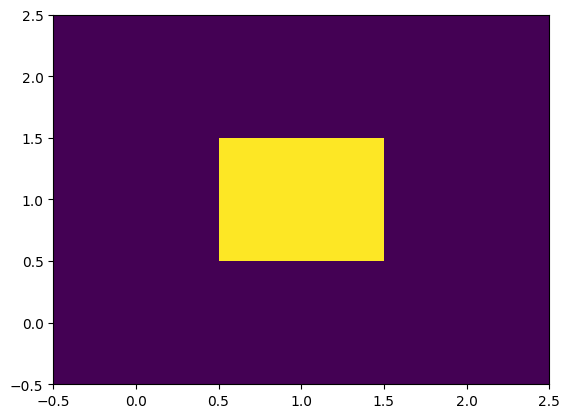

In [22]:
fig, ax = plt.subplots()
X, Y = np.meshgrid(range(L), range(L))
ax.pcolormesh(X, Y, spins)